# Q3

Dataset input: **problem3_data.csv**, 

In [108]:
import pandas as pd

In [109]:
df = pd.read_csv('/Users/Zhuanz/Downloads/A1_FIN3080_121090037/problem 3_data.csv').dropna()
df['EndDate'] = pd.to_datetime(df['EndDate'])
print(df.sample(3))
print()
print(df.dtypes)
print()
print(df.info())


       Symbol    EndDate  TotalRevenue    ROEC
13005    2115 2012-12-31  1.084177e+09  0.0855
45211  600735 2002-12-31  8.631336e+07 -0.2239
54540  603817 2019-12-31  6.405507e+08  0.0723

Symbol                   int64
EndDate         datetime64[ns]
TotalRevenue           float64
ROEC                   float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 56282 entries, 0 to 57270
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        56282 non-null  int64         
 1   EndDate       56282 non-null  datetime64[ns]
 2   TotalRevenue  56282 non-null  float64       
 3   ROEC          56282 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.1 MB
None


In [110]:
print(df['EndDate'].min())
print(df['EndDate'].max())

2000-12-31 00:00:00
2023-12-31 00:00:00


Since the dataset contains data out of range, we need to filter out sufficient data as requested (2011-2020).

First, we need to filter out firms that have complete data from 2011 to 2020, it cannot miss data during this range. So its minimal end-date should be smaller than 2011, and maximal end-date should be larger than 2020.

In [111]:
df1 = df.groupby('Symbol').filter(lambda x: x['EndDate'].dt.year.astype(int).min() <= 2011 and x['EndDate'].dt.year.astype(int).max() >= 2020)

In [112]:
df1['EndDate-Year'] = df1['EndDate'].dt.year.astype(int)
df1['TotalRevenueGrowthRate'] = df1.groupby('Symbol')['TotalRevenue'].pct_change(fill_method=None)
df2 = df1[(df1['EndDate-Year'] >= 2011) & (df1['EndDate-Year'] <= 2020)]
print(df2['EndDate'].min())
print(df2['EndDate'].max())

df2 = df2.sort_values(by=['Symbol', 'EndDate'])

2011-12-31 00:00:00
2020-12-31 00:00:00


#### Calculate Annual Median for ROE

In [113]:
roe_annual = df2.groupby('EndDate-Year')['ROEC'].median()
n_group_roe = df2.groupby('EndDate-Year')['ROEC'].count()

print(n_group_roe)

roe_annual

EndDate-Year
2011    2243
2012    2251
2013    2266
2014    2274
2015    2274
2016    2279
2017    2278
2018    2276
2019    2267
2020    2268
Name: ROEC, dtype: int64


EndDate-Year
2011    0.09210
2012    0.06910
2013    0.06630
2014    0.06215
2015    0.05880
2016    0.06240
2017    0.06610
2018    0.05810
2019    0.05720
2020    0.05570
Name: ROEC, dtype: float64

#### Calculate Annual Median for Growth Rate

In [114]:
g_rate_annual = df2.groupby('EndDate-Year')["TotalRevenueGrowthRate"].median()
n_group_rate = df2.groupby('EndDate-Year')["TotalRevenueGrowthRate"].size()

print(n_group_rate)

g_rate_annual

EndDate-Year
2011    2243
2012    2251
2013    2266
2014    2274
2015    2274
2016    2279
2017    2278
2018    2276
2019    2267
2020    2268
Name: TotalRevenueGrowthRate, dtype: int64


EndDate-Year
2011    0.180058
2012    0.067662
2013    0.105704
2014    0.077670
2015    0.034119
2016    0.103002
2017    0.162389
2018    0.088454
2019    0.051004
2020    0.017281
Name: TotalRevenueGrowthRate, dtype: float64

#### Find consistently above median firms

In [115]:
lst_above_roe = [0]*10
lst_above_rate = [0]*10

final_roe = []
final_rate = []


In [116]:
import matplotlib.pyplot as plt

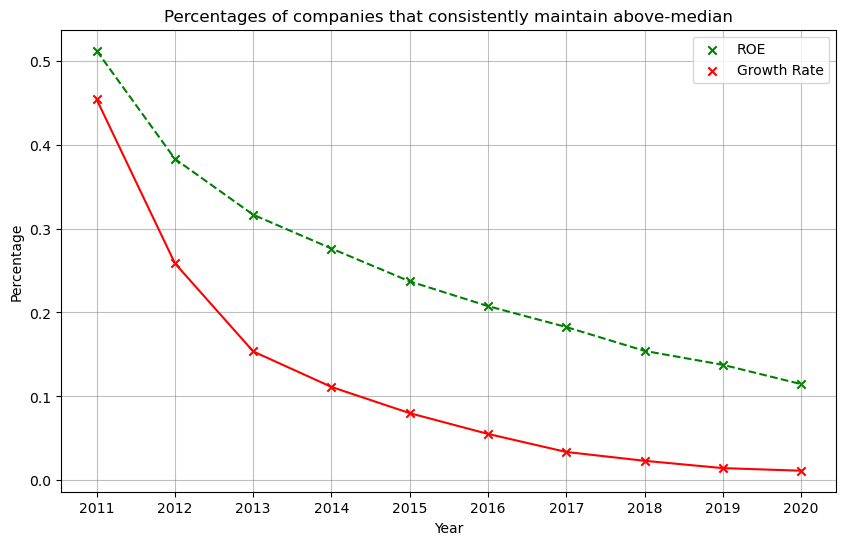

In [ ]:
for symbol, group in df2.groupby('Symbol'):
    # Count above-median ROE
    for i, value in enumerate(group['ROEC']):
        if value >= roe_annual[2011 + i]:
            lst_above_roe[i] += 1
        else:
            break  
    
    # Count above-median Total Revenue Growth Rate
    for i, value in enumerate(group['TotalRevenueGrowthRate']):
        if value >= g_rate_annual[2011 + i]:
            lst_above_rate[i] += 1
        else:
            break 
        
# Calculate the percentages of companies that maintain above-median ROE and growth rate
for i, size in enumerate(n_group_roe):
    final_roe.append(lst_above_roe[i] / size)

for i, size in enumerate(n_group_rate):
    final_rate.append(lst_above_rate[i] / size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(range(2011, 2021), final_roe, label='ROE', color='g', marker='x')
plt.scatter(range(2011, 2021), final_rate, label='Growth Rate', color='r', marker='x')
plt.plot(range(2011, 2021), final_roe, color='g', linestyle='--')
plt.plot(range(2011, 2021), final_rate, color='r', linestyle='-')
plt.title('Percentages of Companies that Consistently Maintain Above Median')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(range(2011, 2021))
plt.grid(True, color='gray', alpha=0.5)
plt.legend()
plt.show()